In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
REL = '/home4/shubham/Disaster-Response-and-Damage-Assessment/'
TRAIN = REL + 'CrisisMMD_v2.0/task_humanitarian_text_img_train.tsv'
VAL = REL + 'CrisisMMD_v2.0/task_humanitarian_text_img_dev.tsv'
TEST = REL + 'CrisisMMD_v2.0/task_humanitarian_text_img_test.tsv'
VIZ = REL + 'visualization/'
DATASET_CSV = REL + 'dataset_csv/'

In [3]:
def read_csv(path):
    """
    Read tsv files and remove rows with label mismatch between text and images.
    :param path: path to tsv file.
    :return df: dataframe object of original tsv file.
    :return new_df: dataframe object of processed tsv file.
    """
    
    df = pd.read_csv(path, sep='\t')    
    new_df = df.loc[df['label_text_image'] == 'Positive']
    
    return df, new_df


def plot_label_matching(original, processed):
    """
    Plots data statistics pre and post label matching on train, test and validation splits.
    """
    X = ['Train', 'Validation', 'Test']

    X_axis = np.arange(len(X))

    plt.bar(X_axis - 0.2, original, 0.4, label = 'Pre Label Matching')
    plt.bar(X_axis + 0.2, processed, 0.4, label = 'Post Label Matching')


    plt.xticks(X_axis, X)
    plt.xlabel("Data Split")
    plt.ylabel("Number of tweets")
    plt.title("Data Stastics: Label Matching")
    plt.legend()
    plt.savefig(VIZ + 'data_preprocessing_label_matching.png')
    
def plot_category_analysis(count_dict, title, filename):
    """
    Plots horizontal bar graphs for each category and its count.
    :param count_dict: dictionary with key as category and value as count.
    :param title: title of the bar plot.
    :param filename: name of the png file.
    """
    y= count_dict['Categories']
    x =count_dict['Counts']

    plt.barh(y, x)

    plt.ylabel("Humanitarian Categories")

    plt.xlabel("Data per Category")
    plt.title(title)
    plt.savefig(VIZ + filename)
    
    
def get_categories_and_counts(df):
    """
    Returns a dictionary containing each category and its frequency count.
    :param df: train/test/val dataframe
    """
    counts = df['label'].value_counts()

    count_dict = {'Categories':[], 'Counts':[]}
    for k, v in counts.items():
        count_dict['Categories'].append(k)
        count_dict['Counts'].append(v)
        
    return count_dict

def combine_features(pre_df):
    """
    Performs feature engineering by combining 'missing_or_found_people', 'injured_or_dead_people' to 'affected_individuals'
    And by adding 'vehicle_damage' to 'infrastructure_and_utility_damage'.
    :param pre_df: train/test/val dataframe.
    :return df: feature engineered dataframe.
    """
    df = pre_df.copy(deep=True)
    drop_classes = ['missing_or_found_people', 'injured_or_dead_people']
    df.loc[df.label.isin(drop_classes), "label"] = "affected_individuals"
    df.loc[df.label == "vehicle_damage", "label"] = "infrastructure_and_utility_damage"
    return df

def print_data_stats(df, categories):
    """
    Prints number of tweets and images in all the humanitarian categories.
    :param df: train/val/test dataframe.
    :param categories: humanitarian categories.
    """
    for cat in categories:
        cat_df = df.loc[df['label']==cat]
        print("Category: ", cat)
        print("Tweets: ",len(set(cat_df['tweet_id'])),"\tImages: ",len(cat_df))

## Read TSV files and remove rows with a label mismatch between tweet and image

In [4]:
train_df, processed_train_df = read_csv(TRAIN)
val_df, processed_val_df = read_csv(VAL)
test_df, processed_test_df = read_csv(TEST)

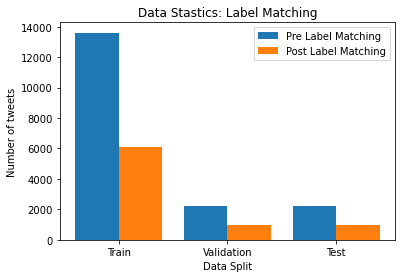

In [5]:
original = [len(train_df), len(val_df), len(test_df)]
processed = [len(processed_train_df), len(processed_val_df), len(processed_test_df)]
    
plot_label_matching(original, processed)

## Category analysis before feature engineering

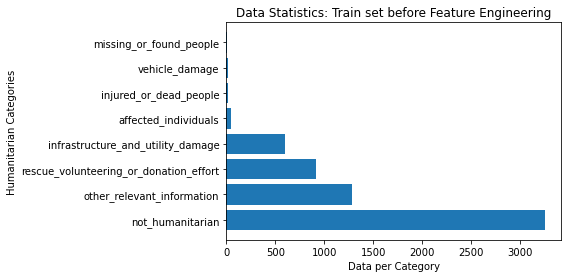

In [6]:
pre_title = "Data Statistics: Train set before Feature Engineering"
pre_image_name = 'data_preprocessing_before_feature_engineering.png'
pre_count_dict = get_categories_and_counts(processed_train_df)
plot_category_analysis(pre_count_dict, pre_title, pre_image_name)

## Category analysis after feature engineering

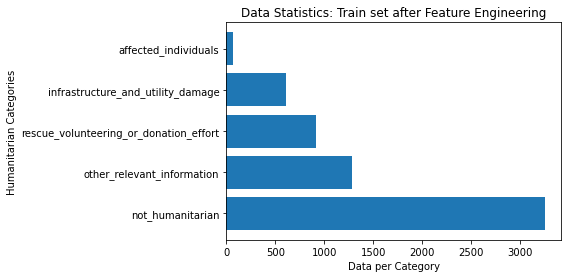

In [7]:
FE_train_df = combine_features(processed_train_df)
FE_val_df = combine_features(processed_val_df)
FE_test_df = combine_features(processed_test_df)

post_title = "Data Statistics: Train set after Feature Engineering"
post_image_name = 'data_preprocessing_after_feature_engineering.png'
post_count_dict = get_categories_and_counts(FE_train_df)
plot_category_analysis(post_count_dict, post_title, post_image_name)

## New categories:

In [8]:
categories = post_count_dict['Categories']
print("New Humanitarian Categories post feature engineering are: \n")
for cat in categories:
    print(cat)

New Humanitarian Categories post feature engineering are: 

not_humanitarian
other_relevant_information
rescue_volunteering_or_donation_effort
infrastructure_and_utility_damage
affected_individuals


## Data stats: image and text split for train, val and test dataset

In [10]:
print("Data Statistics for Train split:\n")
print_data_stats(FE_train_df, categories)
print("\nData Statistics for Validation split:\n")
print_data_stats(FE_val_df, categories)
print("\nData Statistics for Test split:\n")
print_data_stats(FE_test_df, categories)

Data Statistics for Train split:

Category:  not_humanitarian
Tweets:  2743 	Images:  3252
Category:  other_relevant_information
Tweets:  1192 	Images:  1279
Category:  rescue_volunteering_or_donation_effort
Tweets:  762 	Images:  912
Category:  infrastructure_and_utility_damage
Tweets:  496 	Images:  612
Category:  affected_individuals
Tweets:  70 	Images:  71

Data Statistics for Validation split:

Category:  not_humanitarian
Tweets:  521 	Images:  521
Category:  other_relevant_information
Tweets:  239 	Images:  239
Category:  rescue_volunteering_or_donation_effort
Tweets:  149 	Images:  149
Category:  infrastructure_and_utility_damage
Tweets:  80 	Images:  80
Category:  affected_individuals
Tweets:  9 	Images:  9

Data Statistics for Test split:

Category:  not_humanitarian
Tweets:  504 	Images:  504
Category:  other_relevant_information
Tweets:  235 	Images:  235
Category:  rescue_volunteering_or_donation_effort
Tweets:  126 	Images:  126
Category:  infrastructure_and_utility_damag

## Create final train, val and test CSVs

In [11]:
drop_cols = ['label_text', 'label_image', 'label_text_image']
final_train_df = FE_train_df.drop(columns=drop_cols)
final_val_df = FE_val_df.drop(columns=drop_cols)
final_test_df = FE_test_df.drop(columns=drop_cols)

final_train_df.to_csv(DATASET_CSV + "task_humanitarian_train_data.csv")
final_val_df.to_csv(DATASET_CSV + "task_humanitarian_val_data.csv")
final_test_df.to_csv(DATASET_CSV + "task_humanitarian_test_data.csv")
